<a href="https://colab.research.google.com/github/etgcrog/rede-nerural/blob/master/standard_scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [ ]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
dados = dados.rename(columns={
    "unfinished" : "nao_terminado",
    "expected_hours" : "horas_esperadas",
    "price"   : "preco"
})

In [ ]:
dados.head()

,nao_terminado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
dados['finalizado'] = dados['nao_terminado'].map({0:1, 1:0})

In [ ]:
dados.head()

,nao_terminado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

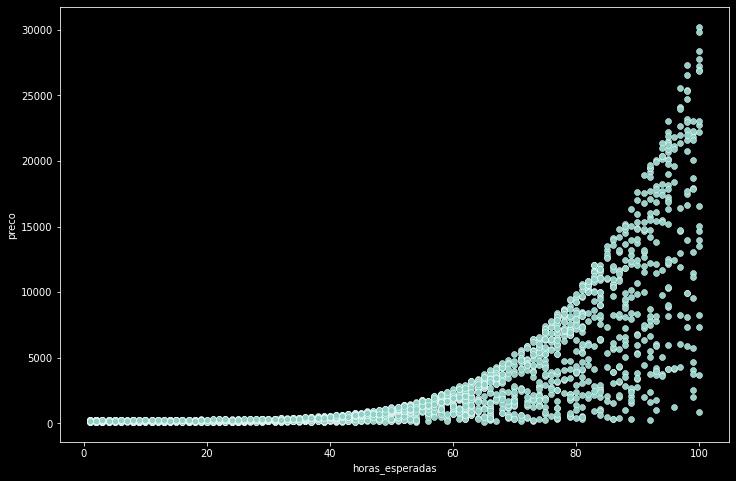

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

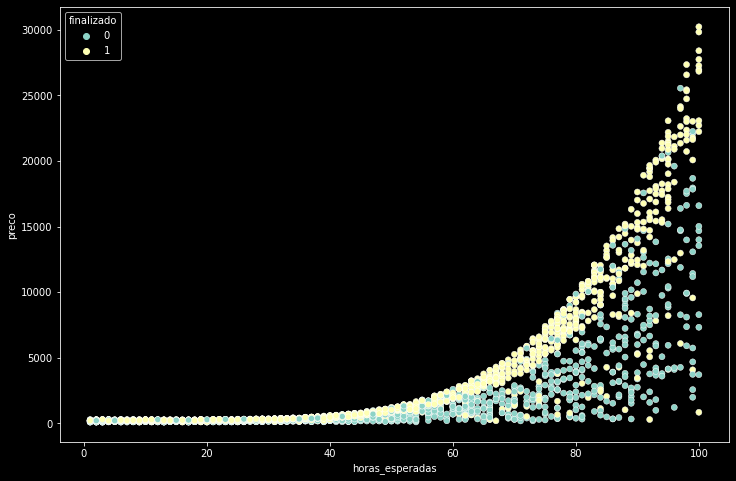

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)

<Figure size 864x576 with 0 Axes>

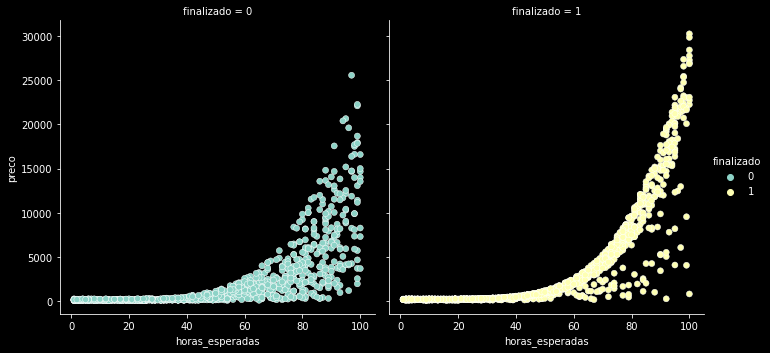

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.relplot(x='horas_esperadas', y='preco', col='finalizado', hue='finalizado', data=dados)

In [ ]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
np.random.seed(5)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

In [ ]:
modelo = LinearSVC()
modelo.fit(x_train, y_train)
previsao = modelo.predict(x_test)
acc = accuracy_score(y_test, previsao)
print(acc)

0.4925925925925926


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:

baseline = np.ones(540)
acuracia_base_line = accuracy_score(y_test, baseline)
print(acuracia_base_line)

0.5259259259259259


In [ ]:
modelo = SVC()
modelo.fit(x_train, y_train)
previsao = modelo.predict(x_test)
acc = accuracy_score(y_test, previsao)
print(acc)

0.5518518518518518


In [ ]:
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
modelo = SVC()
modelo.fit(x_train, y_train)
previsao = modelo.predict(x_test)
acc = accuracy_score(y_test, previsao)
print(acc)

0.6685185185185185
